In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # sometimes cv2.imread() causes a crash in Jupyter

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
img1=cv2.imread(r"/content/drive/MyDrive/Coin_Counter/two.jpg")

In [8]:
img1=cv2.resize(img1,(640,800))

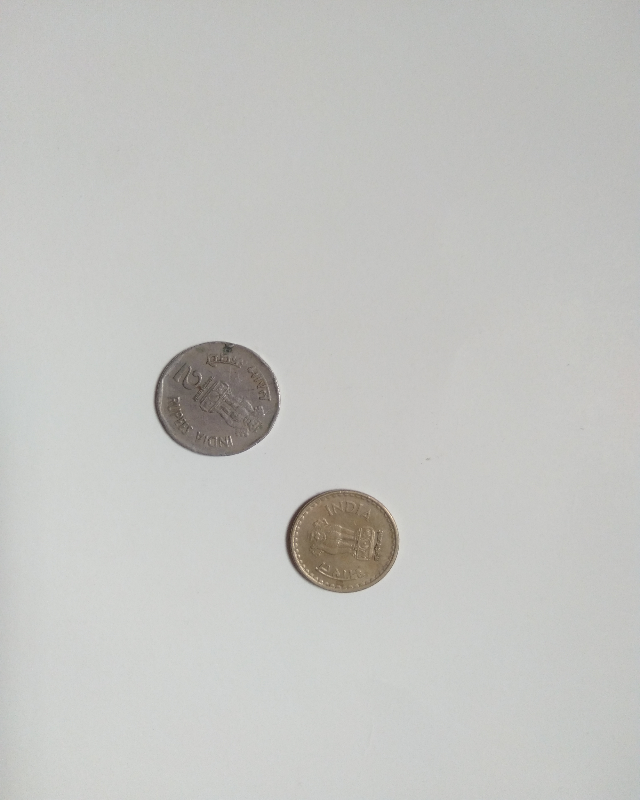

In [9]:
cv2_imshow(img1)


In [10]:
img1_copy=img1.copy()

In [11]:
img1=cv2.GaussianBlur(img1,(7,7),3)

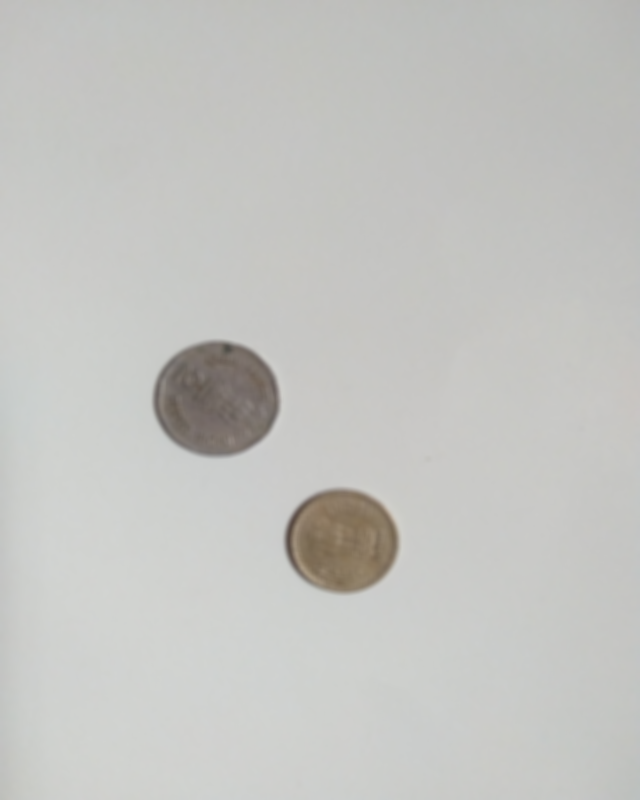

In [12]:
cv2_imshow(img1) #after contouring to remove noise

In [13]:
img1_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) #convert to grayscale
ret,thresh_img=cv2.threshold(img1_gray,170,255,cv2.THRESH_BINARY)#any value in grayscale above 170 will be white,below will be black

The thresholding operation is now applied to img1_gray to ensure that thresh_img is a single-channel grayscale image.

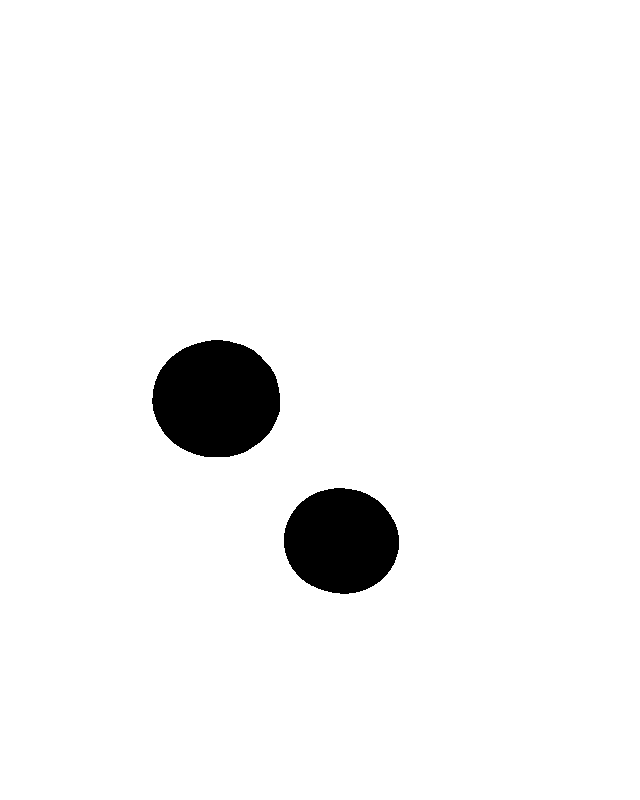

In [14]:
cv2_imshow(thresh_img) #after thresholding to remove noise

In [15]:

#Finding the contours
contours,_=cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # Cast thresh_img to np.uint8 (CV_8UC1)

In [16]:
img1_copy2=cv2.drawContours(img1_copy,contours,-1,(0,255,0),3)

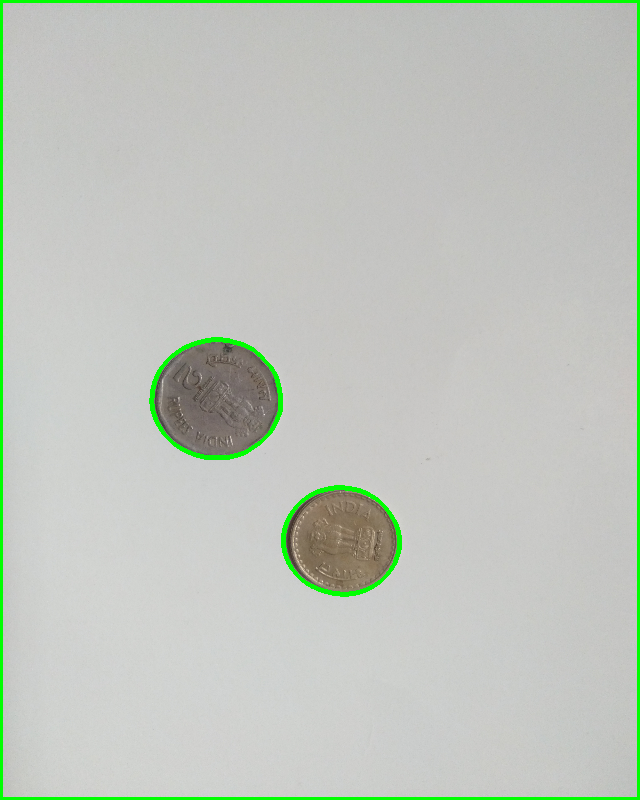

In [17]:
cv2_imshow(img1_copy2) #after contouring

In [18]:
#Finding area for each contour
area={}
for i in range(len(contours)):
  cnt1=contours[i]
  ar1=cv2.contourArea(cnt1)
  area[i]=ar1

In [19]:
print(area) #the first key corresponds to the complete image mostly and has the highest value

{0: 510561.0, 1: 9704.5, 2: 11978.0}


In [20]:
srt_area=sorted(area.items(),key=lambda x:x[1],reverse=True) #sorting to get diffrentiation between the coins and blotches
print(srt_area)

[(0, 510561.0), (2, 11978.0), (1, 9704.5)]


In [21]:
 results=np.array(srt_area).astype(int)#converting to numpy array
 print(results)

[[     0 510561]
 [     2  11978]
 [     1   9704]]


In [22]:
num=np.argwhere(results[:,1]>500).shape[0]
print(num)

3


The num is given as 5 because there are 4 coins in the image + the complete background as well

In [23]:
for i in range(1,num):#starting from 1 because we knw that 0 is our entire image
    img1_copy=cv2.drawContours(img1_copy,contours[results[i][0]],-1,(0,255,0),3)
print("Number of coins:",num-1)

Number of coins: 2


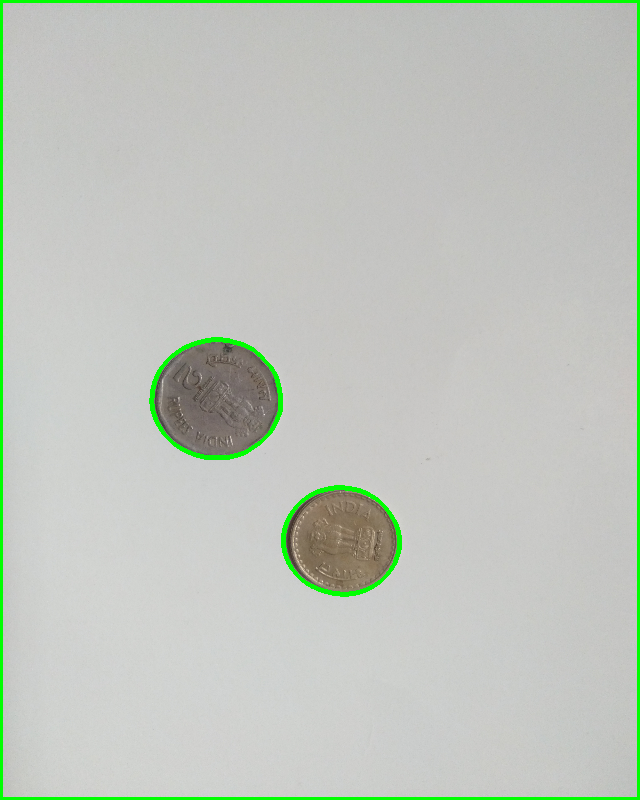

In [24]:
cv2_imshow(img1_copy)